In [14]:
from langgraph.graph import StateGraph
from typing import TypedDict

In [15]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str
    skills: list[str]

In [21]:
def first_process(state: AgentState) -> AgentState:
    """First node that does the process"""

    state['final'] = f"Hi {state['name']}, "
    return state

def second_process(state: AgentState) -> AgentState:
    """Second node that does the process"""

    state['final'] = state['final'] + f"Your age is {state['age']}. "
    return state


def third_process(state: AgentState) -> AgentState:
    """Third node that does the process"""

    state['final'] = state['final'] + f"Your skills are {', '.join(state['skills'])}."
    return state

In [22]:
graph = StateGraph(AgentState)

graph.add_node("first_process", first_process)
graph.add_node("second_process", second_process)
graph.add_node("third_process", third_process)


# edge
graph.add_edge("first_process", "second_process")
graph.add_edge("second_process", "third_process")


graph.set_entry_point("first_process")
graph.set_finish_point("third_process")


app = graph.compile()

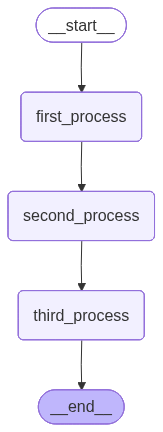

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph(). draw_mermaid_png()))

In [24]:
result = app.invoke({"name": "beast", "age": "27", "skills": ["python", "AI"]})

In [25]:
result

{'name': 'beast',
 'age': '27',
 'final': 'Hi beast, Your age is 27. Your skills are python, AI.',
 'skills': ['python', 'AI']}